In [35]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt

In [36]:
PATH = 'cats_and_dogs_filtered'
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats') 
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  

num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1001
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2001
Total validation images: 1000


In [43]:
batch_size = 128
epochs = 25
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [44]:
train_image_generator = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [45]:
train_data_gen = train_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

val_data_gen = validation_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


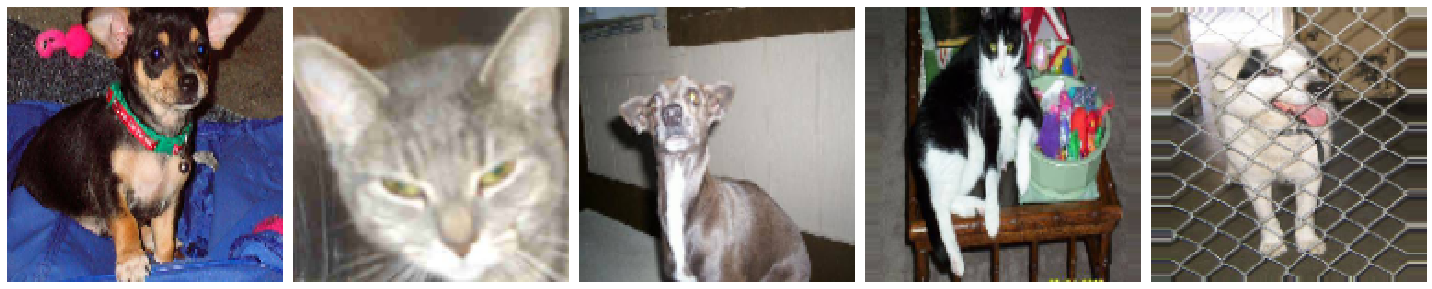

In [46]:
sample_training_images, _ = next(train_data_gen)

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
plotImages(sample_training_images[:5])

In [47]:
model = Sequential([
    Conv2D(64, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    BatchNormalization(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 150, 150, 64)      1792      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 75, 75, 64)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 75, 75, 64)        256       
_________________________________________________________________
dropout_8 (Dropout)          (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 75, 75, 32)        18464     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 37, 37, 16)       

In [48]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/25
15/15 [==============================] - 40s 3s/step - loss: 1.0293 - accuracy: 0.4938 - val_loss: 0.6931 - val_accuracy: 0.5056
Epoch 2/25
15/15 [==============================] - 38s 3s/step - loss: 0.6905 - accuracy: 0.5027 - val_loss: 0.6928 - val_accuracy: 0.4967
Epoch 3/25
15/15 [==============================] - 39s 3s/step - loss: 0.6874 - accuracy: 0.5027 - val_loss: 0.6916 - val_accuracy: 0.5257
Epoch 4/25
15/15 [==============================] - 45s 3s/step - loss: 0.6756 - accuracy: 0.5662 - val_loss: 0.6906 - val_accuracy: 0.5547
Epoch 5/25
15/15 [==============================] - 41s 3s/step - loss: 0.6547 - accuracy: 0.6165 - val_loss: 0.6862 - val_accuracy: 0.6507
Epoch 6/25
15/15 [==============================] - 41s 3s/step - loss: 0.6253 - accuracy: 0.6528 - val_loss: 0.6869 - val_accuracy: 0.5748
Epoch 7/25
15/15 [==============================] - 43s 3s/step - loss: 0.5996 - accuracy: 0.6715 - val_loss: 0.6724 - val_accuracy: 0.6719
Epoch 8/25
15/15 [==

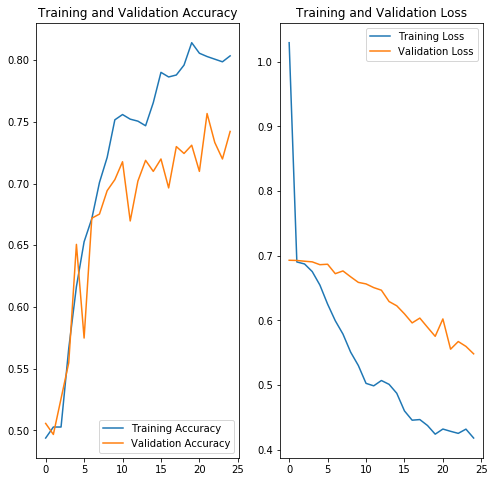

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [50]:
model.save('cat_dog.h5')

In [70]:
from keras.preprocessing.image import load_img, img_to_array
n = 100

### TESTING TRAIN DOG SET
print('TRAIN DOG SET')
c = 0
for i in range(n):
    
    dir = train_dogs_dir
    
    directory = os.listdir(dir)
    img = os.path.join(dir, directory[i])

    image = load_img(img, target_size=(150, 150))

    input_arr = img_to_array(image)
    input_arr = np.array([input_arr/255])  # Convert single image to a batch.
    predictions = model.predict(input_arr)
    if predictions > 0.5:
        print('dog')
        c+=1
    else:
        print('cat')

# print("% right answers = ", "%.2f" % )
print("Count correct answers in percentage = ", "%.2f" % (c/n * 100))


### TESTING TRAIN CAT SET
print('TRAIN CAT SET')
c = 0
for i in range(n):
    
    dir = train_cats_dir
    
    directory = os.listdir(dir)
    img = os.path.join(dir, directory[i])

    image = load_img(img, target_size=(150, 150))

    input_arr = img_to_array(image)
    input_arr = np.array([input_arr/255])  # Convert single image to a batch.
    predictions = model.predict(input_arr)
    if predictions > 0.5:
        print('dog')
    else:
        print('cat')
        c+=1

print("Count correct answers in percentage  = ", "%.2f" % (c/n * 100))


### TESTING VALIDATION DOG SET
print('VALIDATION DOG SET')
c = 0
for i in range(n):
    
    dir = validation_dogs_dir
    
    directory = os.listdir(dir)
    img = os.path.join(dir, directory[i])

    image = load_img(img, target_size=(150, 150))

    input_arr = img_to_array(image)
    input_arr = np.array([input_arr/255])
    predictions = model.predict(input_arr)
    if predictions > 0.5:
        print('dog')
        c+=1
    else:
        print('cat')

# print("% right answers = ", "%.2f" % )
print("Count correct answers in percentage = ", "%.2f" % (c/n * 100))


### TESTING VALIDATION CAT SET
print('VALIDATION CAT SET')
c = 0
for i in range(n):
    
    dir = validation_cats_dir
    
    directory = os.listdir(dir)
    img = os.path.join(dir, directory[i])

    image = load_img(img, target_size=(150, 150))

    input_arr = img_to_array(image)
    input_arr = np.array([input_arr/255])
    predictions = model.predict(input_arr)
    if predictions > 0.5:
        print('dog')
    else:
        print('cat')
        c+=1

print("Count correct answers in percentage  = ", "%.2f" % (c/n * 100))

TRAIN DOG SET
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
cat
dog
cat
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
cat
dog
cat
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
cat
cat
dog
dog
cat
dog
dog
dog
dog
dog
cat
dog
cat
dog
dog
dog
dog
cat
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
dog
cat
dog
dog
dog
dog
dog
Count correct answers in percentage =  89.00
TRAIN CAT SET
cat
cat
dog
cat
dog
dog
cat
cat
cat
cat
dog
cat
dog
cat
cat
cat
dog
cat
cat
cat
cat
dog
cat
cat
cat
cat
cat
cat
cat
dog
cat
cat
dog
dog
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
dog
cat
cat
cat
cat
cat
cat
dog
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
dog
dog
cat
dog
dog
cat
cat
cat
cat
cat
cat
cat
cat
dog
cat
cat
cat
cat
cat
cat
cat
cat
cat
cat
dog
cat
cat
Count correct answers in percentage  =  82.00
VALIDATION DOG SET
dog
cat
cat
cat
dog
cat
dog
dog
dog
dog
dog
cat
dog
dog
dog
do